In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Listas de las fechas

In [ ]:
dates_1 = pd.date_range(start='1993-01-01', end='2002-12-31')
dates_2 = pd.date_range(start='2003-01-01', end='2012-12-31')
dates_3 = pd.date_range(start='2013-01-01', end='2022-12-31')

# Convert to list of strings in the format YYYY-MM-DD
date_strings_1 = dates_1.strftime('%Y-%m-%d').tolist()
date_strings_2 = dates_2.strftime('%Y-%m-%d').tolist()
date_strings_3 = dates_3.strftime('%Y-%m-%d').tolist()

date_strings = [date_strings_1, date_strings_2, date_strings_3]

## Promedio de las anomalías de cada década

In [ ]:
ugosa_sum_1 = np.zeros((len(ds.latitude), len(ds.longitude)))
vgosa_sum_1 = np.zeros((len(ds.latitude), len(ds.longitude)))

ugosa_sum_2 = np.zeros((len(ds.latitude), len(ds.longitude)))
vgosa_sum_2 = np.zeros((len(ds.latitude), len(ds.longitude)))

ugosa_sum_3 = np.zeros((len(ds.latitude), len(ds.longitude)))
vgosa_sum_3 = np.zeros((len(ds.latitude), len(ds.longitude)))

ugosa_sum =[ugosa_sum_1, ugosa_sum_2, ugosa_sum_3]
vgosa_sum =[vgosa_sum_1, vgosa_sum_2, vgosa_sum_3]

for k in range(len(date_strings)):
    for i in range(len(date_strings[k])):
        ds_sel = ds.sel(time=date_strings[k][i])

        ugosa = ds_sel['ugosa'].values
        vgosa = ds_sel['vgosa'].values

        ugosa_sum[k] += ugosa
        vgosa_sum[k] += vgosa

    
    ugosa_mean = ugosa_sum[k] / len(date_strings[k])
    vgosa_mean = vgosa_sum[k] / len(date_strings[k])
    np.save('ugosa_mean_'+str(k+1)+'.npy', ugosa_mean)
    np.save('vgosa_mean_'+str(k+1)+'.npy', vgosa_mean)
    print('ugosa_mean_'+str(k+1)+'.npy', 'vgosa_mean_'+str(k+1)+'.npy', 'saved')


ugosa_mean_1 = np.load('ugosa_mean_1.npy')
ugosa_mean_2 = np.load('ugosa_mean_2.npy')
ugosa_mean_3 = np.load('ugosa_mean_3.npy')

vgosa_mean_1 = np.load('vgosa_mean_1.npy')
vgosa_mean_2 = np.load('vgosa_mean_2.npy')
vgosa_mean_3 = np.load('vgosa_mean_3.npy')

ugosa_mean = [ugosa_mean_1, ugosa_mean_2, ugosa_mean_3]
vgosa_mean = [vgosa_mean_1, vgosa_mean_2, vgosa_mean_3]

### Matrices vacías para EKE, MKE y TKE

In [ ]:
#EKE
EKE_sum_1 = np.zeros((len(ds.latitude), len(ds.longitude)))
EKE_sum_2 = np.zeros((len(ds.latitude), len(ds.longitude)))
EKE_sum_3 = np.zeros((len(ds.latitude), len(ds.longitude)))

EKE_sum = [EKE_sum_1, EKE_sum_2, EKE_sum_3]


#MKE
ugos_sum_1 = np.zeros((len(ds.latitude), len(ds.longitude)))
vgos_sum_1 = np.zeros((len(ds.latitude), len(ds.longitude)))

ugos_sum_2 = np.zeros((len(ds.latitude), len(ds.longitude)))
vgos_sum_2 = np.zeros((len(ds.latitude), len(ds.longitude)))

ugos_sum_3 = np.zeros((len(ds.latitude), len(ds.longitude)))
vgos_sum_3 = np.zeros((len(ds.latitude), len(ds.longitude)))

ugos_sum = [ugos_sum_1, ugos_sum_2, ugos_sum_3]
vgos_sum = [vgos_sum_1, vgos_sum_2, vgos_sum_3]

#TKE
TKE_sum_1 = np.zeros((len(ds.latitude), len(ds.longitude)))
TKE_sum_2 = np.zeros((len(ds.latitude), len(ds.longitude)))
TKE_sum_3 = np.zeros((len(ds.latitude), len(ds.longitude)))

TKE_sum = [TKE_sum_1, TKE_sum_2, TKE_sum_3]

In [ ]:
ρ = 1025
for k in range(len(EKE_sum)):
    for i in range(len(date_strings[k])):
        ds_sel = ds.sel(time=date_strings[k][i])

        #EKE
        ugosa = ds_sel['ugosa'].values - ugosa_mean[k]
        vgosa = ds_sel['vgosa'].values - vgosa_mean[k]

        EKE = 0.5 * ρ * ((ugosa**2) + (vgosa**2))
        EKE_sum[k] += EKE

        #MKE
        ugos = ds_sel['ugos'].values
        vgos = ds_sel['vgos'].values

        ugos_sum[k] += ugos
        vgos_sum[k] += vgos

        #TKE
        TKE = 0.5 * ρ * ((ugos**2) + (vgos**2))
        TKE_sum[k] += TKE
    
    mean_EKE = EKE_sum[k] / len(date_strings[k])

    ugos_mean = ugos_sum[k] / len(date_strings[k])
    vgos_mean = vgos_sum[k] / len(date_strings[k])
    MKE = 0.5 * ρ * ((ugos_mean**2) + (vgos_mean**2))

    mean_TKE = TKE_sum[k] / len(date_strings[k])

    np.save('mean_EKE_'+str(k+1)+'.npy', mean_EKE)
    np.save('MKE_'+str(k+1)+'.npy', MKE)
    np.save('mean_TKE_'+str(k+1)+'.npy', mean_TKE)
    print('mean_EKE_'+str(k+1)+'.npy', 'MKE_'+str(k+1)+'.npy', 'mean_TKE_'+str(k+1)+'.npy', 'saved')


mean_EKE_1 = np.load('mean_EKE_1.npy')
mean_EKE_2 = np.load('mean_EKE_2.npy')
mean_EKE_3 = np.load('mean_EKE_3.npy')

MKE_1 = np.load('MKE_1.npy')
MKE_2 = np.load('MKE_2.npy')
MKE_3 = np.load('MKE_3.npy')

mean_TKE_1 = np.load('mean_TKE_1.npy')
mean_TKE_2 = np.load('mean_TKE_2.npy')
mean_TKE_3 = np.load('mean_TKE_3.npy')

mean_EKE = [mean_EKE_1, mean_EKE_2, mean_EKE_3]
MKE = [MKE_1, MKE_2, MKE_3]
mean_TKE = [mean_TKE_1, mean_TKE_2, mean_TKE_3]

## Cálculo %

In [2]:
decades = ['1993-2002', '2003-2012', '2013-2022']


mean_EKE_1 = np.load('mean_EKE_1.npy')
mean_EKE_2 = np.load('mean_EKE_2.npy')
mean_EKE_3 = np.load('mean_EKE_3.npy')

#test son las nuevas
MKE_1 = np.load('MKE_1_test.npy')
MKE_2 = np.load('MKE_2_test.npy')
MKE_3 = np.load('MKE_3_test.npy')

mean_TKE_1 = np.load('mean_TKE_1_test.npy')
mean_TKE_2 = np.load('mean_TKE_2_test.npy')
mean_TKE_3 = np.load('mean_TKE_3_test.npy')

mean_EKE = [mean_EKE_1, mean_EKE_2, mean_EKE_3]
MKE = [MKE_1, MKE_2, MKE_3]
mean_TKE = [mean_TKE_1, mean_TKE_2, mean_TKE_3]

In [3]:
mean_EKE_total = np.load('mean_EKE_final.npy')
MKE_total = np.load('MKE_final.npy')
mean_TKE_total = np.load('mean_TKE_final.npy')

In [4]:
mean_EKE_MEAN = np.zeros(4)
mean_TKE_MEAN = np.zeros(4)
MKE_MEAN = np.zeros(4)

for k in range(4):
    if k == 3:
        mean_EKE_MEAN[k] = np.nanmean(mean_EKE_total)
        MKE_MEAN[k] = np.nanmean(MKE_total)
        mean_TKE_MEAN[k] = np.nanmean(mean_TKE_total)
    else:
        mean_EKE_MEAN[k] = np.nanmean(mean_EKE[k])
        MKE_MEAN[k] = np.nanmean(MKE[k])
        mean_TKE_MEAN[k] = np.nanmean(mean_TKE[k])

mean_EKE_MEAN = mean_EKE_MEAN/1025 *10**4
mean_TKE_MEAN = mean_TKE_MEAN/1025 *10**4
MKE_MEAN = MKE_MEAN/1025 *10**4

print('mean_EKE_MEAN:', mean_EKE_MEAN)
print('MKE_MEAN:', MKE_MEAN)
print('mean_TKE_MEAN:', mean_TKE_MEAN)  

mean_EKE_MEAN: [206.06108187 204.98135901 210.9484223  213.04486612]
MKE_MEAN: [68.64007343 69.60681223 72.40942769 69.25858243]
mean_TKE_MEAN: [274.45060502 274.2952386  282.41958794 281.71516224]


In [5]:
MKE_TKE_ratio = MKE_MEAN / mean_TKE_MEAN
EKE_TKE_ratio = mean_EKE_MEAN / mean_TKE_MEAN
MKE_EKE_ratio = MKE_MEAN / mean_EKE_MEAN

print('MKE_TKE_ratio:', MKE_TKE_ratio*100)
print('EKE_TKE_ratio:', EKE_TKE_ratio*100)
print('MKE_EKE_ratio:', MKE_EKE_ratio*100)

MKE_TKE_ratio: [25.00999166 25.37660245 25.63895381 24.58461301]
EKE_TKE_ratio: [75.08129991 74.7301922  74.69326892 75.62421008]
MKE_EKE_ratio: [33.31054695 33.95763037 34.32565501 32.50891875]


In [6]:
# create a dataframe
import pandas as pd
data = {'Decade': decades +['1993-2022'],
        'MKE/TKE': MKE_TKE_ratio*100,
        'EKE/TKE': EKE_TKE_ratio*100,
        'sum': MKE_TKE_ratio*100 + EKE_TKE_ratio*100}

df = pd.DataFrame(data).transpose()
print(df)

                  0           1           2           3
Decade    1993-2002   2003-2012   2013-2022   1993-2022
MKE/TKE   25.009992   25.376602   25.638954   24.584613
EKE/TKE     75.0813   74.730192   74.693269    75.62421
sum      100.091292  100.106795  100.332223  100.208823


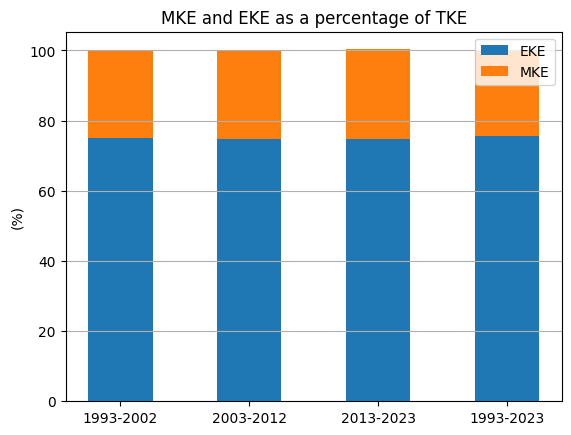

In [7]:
# plot in a stacked bar chart
years = (
    "1993-2002",
    "2003-2012",
    "2013-2023",
    "1993-2023",
)
means = {
    "EKE": EKE_TKE_ratio*100,
    "MKE": MKE_TKE_ratio*100,
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, means in means.items():
    p = ax.bar(years, means, width, label=boolean, bottom=bottom)
    bottom += means

ax.set_title("MKE and EKE as a percentage of TKE")
ax.legend(loc="upper right")
ax.set_ylabel("(%)")
ax.yaxis.grid(True)
plt.show()